In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
spark = SparkSession.builder.appName('LUNG_CANCER').getOrCreate()

In [ ]:
df = spark.read.csv('/content/drive/MyDrive/BIG DATA LANJUT/UAS/lung_cancer.csv', header=True, inferSchema=True)
df.printSchema()

root
 |-- GENDER: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- SMOKING: integer (nullable = true)
 |-- YELLOW_FINGERS: integer (nullable = true)
 |-- ANXIETY: integer (nullable = true)
 |-- PEER_PRESSURE: integer (nullable = true)
 |-- CHRONIC DISEASE: integer (nullable = true)
 |-- FATIGUE : integer (nullable = true)
 |-- ALLERGY : integer (nullable = true)
 |-- WHEEZING: integer (nullable = true)
 |-- ALCOHOL CONSUMING: integer (nullable = true)
 |-- COUGHING: integer (nullable = true)
 |-- SHORTNESS OF BREATH: integer (nullable = true)
 |-- SWALLOWING DIFFICULTY: integer (nullable = true)
 |-- CHEST PAIN: integer (nullable = true)
 |-- LUNG_CANCER: string (nullable = true)



In [ ]:
pd.DataFrame(df.take(10), columns=df.columns)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
def checknull(data : list) :
  for val in data :
    count_null = df.select(f.col(val)).filter(f.col(val).isNull()).count()
    print("Kolom {} memiliki jumlah data kosong sebanyak {}".format(str(val), str(count_null)))

In [ ]:
checknull(df.columns)

Kolom GENDER memiliki jumlah data kosong sebanyak 0
Kolom AGE memiliki jumlah data kosong sebanyak 0
Kolom SMOKING memiliki jumlah data kosong sebanyak 0
Kolom YELLOW_FINGERS memiliki jumlah data kosong sebanyak 0
Kolom ANXIETY memiliki jumlah data kosong sebanyak 0
Kolom PEER_PRESSURE memiliki jumlah data kosong sebanyak 0
Kolom CHRONIC DISEASE memiliki jumlah data kosong sebanyak 0
Kolom FATIGUE  memiliki jumlah data kosong sebanyak 0
Kolom ALLERGY  memiliki jumlah data kosong sebanyak 0
Kolom WHEEZING memiliki jumlah data kosong sebanyak 0
Kolom ALCOHOL CONSUMING memiliki jumlah data kosong sebanyak 0
Kolom COUGHING memiliki jumlah data kosong sebanyak 0
Kolom SHORTNESS OF BREATH memiliki jumlah data kosong sebanyak 0
Kolom SWALLOWING DIFFICULTY memiliki jumlah data kosong sebanyak 0
Kolom CHEST PAIN memiliki jumlah data kosong sebanyak 0
Kolom LUNG_CANCER memiliki jumlah data kosong sebanyak 0


In [ ]:
def toLowerCase(data) :
  for val in data.columns :
    data = data.withColumnRenamed(str(val), str(val).lower())

  return data

In [ ]:
df = toLowerCase(df)

In [ ]:
df.select("*").show()

+------+---+-------+--------------+-------+-------------+---------------+--------+--------+--------+-----------------+--------+-------------------+---------------------+----------+-----------+
|gender|age|smoking|yellow_fingers|anxiety|peer_pressure|chronic disease|fatigue |allergy |wheezing|alcohol consuming|coughing|shortness of breath|swallowing difficulty|chest pain|lung_cancer|
+------+---+-------+--------------+-------+-------------+---------------+--------+--------+--------+-----------------+--------+-------------------+---------------------+----------+-----------+
|     M| 69|      1|             2|      2|            1|              1|       2|       1|       2|                2|       2|                  2|                    2|         2|        YES|
|     M| 74|      2|             1|      1|            1|              2|       2|       2|       1|                1|       1|                  2|                    2|         2|        YES|
|     F| 59|      1|             1|

In [ ]:
df.printSchema()

root
 |-- gender: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- smoking: integer (nullable = true)
 |-- yellow_fingers: integer (nullable = true)
 |-- anxiety: integer (nullable = true)
 |-- peer_pressure: integer (nullable = true)
 |-- chronic disease: integer (nullable = true)
 |-- fatigue : integer (nullable = true)
 |-- allergy : integer (nullable = true)
 |-- wheezing: integer (nullable = true)
 |-- alcohol consuming: integer (nullable = true)
 |-- coughing: integer (nullable = true)
 |-- shortness of breath: integer (nullable = true)
 |-- swallowing difficulty: integer (nullable = true)
 |-- chest pain: integer (nullable = true)
 |-- lung_cancer: string (nullable = true)



In [ ]:
from pyspark.sql.functions import when
df = df.withColumn("gender", when(df["gender"] == "M", 1).otherwise(0))

# Mengubah tipe data kolom lung_cancer menjadi integer
df = df.withColumn("lung_cancer", when(df["lung_cancer"] == "YES", 1).otherwise(0))

In [ ]:
df.printSchema()

root
 |-- gender: integer (nullable = false)
 |-- age: integer (nullable = true)
 |-- smoking: integer (nullable = true)
 |-- yellow_fingers: integer (nullable = true)
 |-- anxiety: integer (nullable = true)
 |-- peer_pressure: integer (nullable = true)
 |-- chronic disease: integer (nullable = true)
 |-- fatigue : integer (nullable = true)
 |-- allergy : integer (nullable = true)
 |-- wheezing: integer (nullable = true)
 |-- alcohol consuming: integer (nullable = true)
 |-- coughing: integer (nullable = true)
 |-- shortness of breath: integer (nullable = true)
 |-- swallowing difficulty: integer (nullable = true)
 |-- chest pain: integer (nullable = true)
 |-- lung_cancer: integer (nullable = false)



In [ ]:
df.show()

+------+---+-------+--------------+-------+-------------+---------------+--------+--------+--------+-----------------+--------+-------------------+---------------------+----------+-----------+
|gender|age|smoking|yellow_fingers|anxiety|peer_pressure|chronic disease|fatigue |allergy |wheezing|alcohol consuming|coughing|shortness of breath|swallowing difficulty|chest pain|lung_cancer|
+------+---+-------+--------------+-------+-------------+---------------+--------+--------+--------+-----------------+--------+-------------------+---------------------+----------+-----------+
|     1| 69|      1|             2|      2|            1|              1|       2|       1|       2|                2|       2|                  2|                    2|         2|          1|
|     1| 74|      2|             1|      1|            1|              2|       2|       2|       1|                1|       1|                  2|                    2|         2|          1|
|     0| 59|      1|             1|

In [ ]:
summary = df.describe()
summary.show()

+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+---------------------+-------------------+-------------------+
|summary|            gender|              age|           smoking|     yellow_fingers|           anxiety|     peer_pressure|   chronic disease|          fatigue |           allergy |           wheezing| alcohol consuming|          coughing|shortness of breath|swallowing difficulty|         chest pain|        lung_cancer|
+-------+------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+------------------+-------------------+---------------------+-------------------+-------------------+
|  count|               309|      

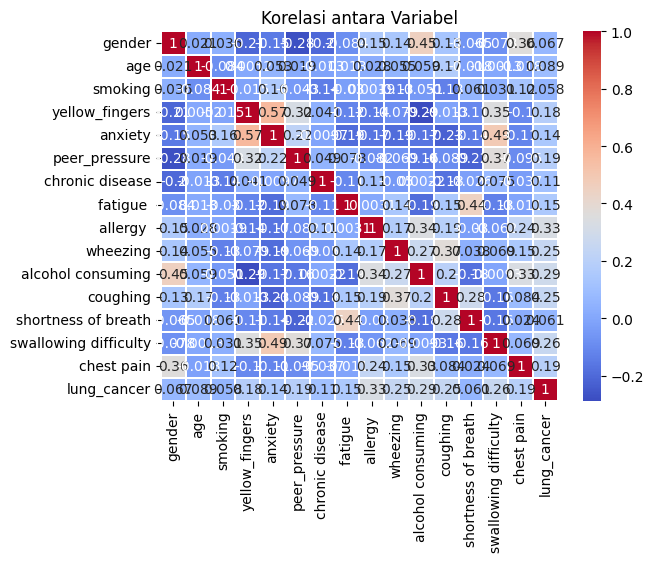

In [ ]:
df_pandas = df.toPandas()

# Menampilkan matriks korelasi menggunakan Seaborn
corr_matrix = df_pandas.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.30)
plt.title("Korelasi antara Variabel")
plt.show()

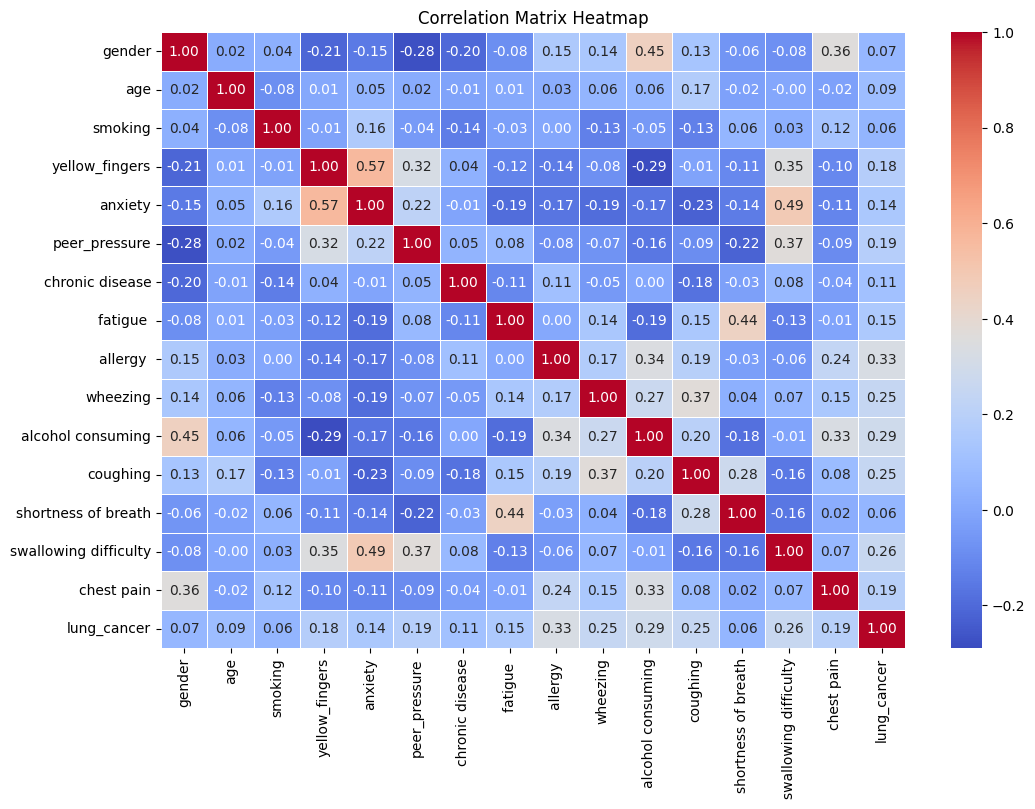

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import (GBTClassifier, NaiveBayes, RandomForestClassifier, LinearSVC)
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.sql.functions import when

In [ ]:
feature_columns = df.columns[:-1]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

In [ ]:
(train_data, test_data) = df.randomSplit([0.8, 0.2], seed=123)

In [ ]:
# Inisialisasi model
svc = LinearSVC(maxIter=10, labelCol="lung_cancer", featuresCol="features")
gbt = GBTClassifier(maxIter=10, labelCol="lung_cancer", featuresCol="features")
nb = NaiveBayes(labelCol="lung_cancer", featuresCol="features")
rf = RandomForestClassifier(numTrees=10, labelCol="lung_cancer", featuresCol="features")

In [ ]:
# Buat pipeline untuk masing-masing model
pipeline_svc = Pipeline(stages=[svc])
pipeline_gbt = Pipeline(stages=[gbt])
pipeline_nb = Pipeline(stages=[nb])
pipeline_rf = Pipeline(stages=[rf])

In [ ]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, test_data):
    predictions = model.transform(test_data)
    evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="lung_cancer")
    auc = evaluator.evaluate(predictions)
    accuracy_evaluator = MulticlassClassificationEvaluator(metricName="accuracy", labelCol="lung_cancer")
    precision_evaluator = MulticlassClassificationEvaluator(metricName="weightedPrecision", labelCol="lung_cancer")
    recall_evaluator = MulticlassClassificationEvaluator(metricName="weightedRecall", labelCol="lung_cancer")
    f1_evaluator = MulticlassClassificationEvaluator(metricName="f1", labelCol="lung_cancer")

    accuracy = accuracy_evaluator.evaluate(predictions)
    precision = precision_evaluator.evaluate(predictions)
    recall = recall_evaluator.evaluate(predictions)
    f1 = f1_evaluator.evaluate(predictions)

    return auc, accuracy, precision, recall, f1


In [ ]:
# Latih dan evaluasi model
model_svc = pipeline_svc.fit(train_data)
model_gbt = pipeline_gbt.fit(train_data)
model_nb = pipeline_nb.fit(train_data)
model_rf = pipeline_rf.fit(train_data)

In [ ]:
auc_svc, accuracy_svc, precision_svc, recall_svc, f1_svc = evaluate_model(model_svc, test_data)
auc_gbt, accuracy_gbt, precision_gbt, recall_gbt, f1_gbt = evaluate_model(model_gbt, test_data)
auc_nb, accuracy_nb, precision_nb, recall_nb, f1_nb = evaluate_model(model_nb, test_data)
auc_rf, accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(model_rf, test_data)

###hasil model dari sekian

In [ ]:
# Menampilkan hasil evaluasi
print("Support Vector Classification:")
print(f"AUC: {auc_svc}, Accuracy: {accuracy_svc}, Precision: {precision_svc}, Recall: {recall_svc}, F1 Score: {f1_svc}")

print("\nGBT Classification:")
print(f"AUC: {auc_gbt}, Accuracy: {accuracy_gbt}, Precision: {precision_gbt}, Recall: {recall_gbt}, F1 Score: {f1_gbt}")

print("\nNaive Bayes:")
print(f"AUC: {auc_nb}, Accuracy: {accuracy_nb}, Precision: {precision_nb}, Recall: {recall_nb}, F1 Score: {f1_nb}")

print("\nRandom Forest:")
print(f"AUC: {auc_rf}, Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}")

Support Vector Classification:
AUC: 0.9576271186440678, Accuracy: 0.9253731343283582, Precision: 0.9218550106609809, Recall: 0.9253731343283582, F1 Score: 0.923199130398428

GBT Classification:
AUC: 0.7828389830508474, Accuracy: 0.8805970149253731, Precision: 0.8939512961508247, Recall: 0.8805970149253731, F1 Score: 0.8862011780179561

Naive Bayes:
AUC: 0.06567796610169492, Accuracy: 0.8805970149253731, Precision: 0.7754511026954779, Recall: 0.8805970149253731, F1 Score: 0.8246860933428096

Random Forest:
AUC: 0.8877118644067796, Accuracy: 0.9253731343283582, Precision: 0.9312033582089553, Recall: 0.9253731343283582, F1 Score: 0.909929289252187


###Hypertunning SVC

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Inisialisasi model SVC
svc = LinearSVC(labelCol="lung_cancer", featuresCol="features")

# Inisialisasi grid parameter untuk SVC
param_grid_svc = ParamGridBuilder() \
    .addGrid(svc.maxIter, [10, 20, 30]) \
    .addGrid(svc.regParam, [0.1, 0.01]) \
    .build()

# Inisialisasi evaluator untuk evaluasi model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="lung_cancer")

# Inisialisasi CrossValidator untuk SVC
crossval_svc = CrossValidator(estimator=svc,
                              estimatorParamMaps=param_grid_svc,
                              evaluator=evaluator,
                              numFolds=3)  # Jumlah lipatan dalam validasi silang

# Melatih model SVC dengan tuning parameter
model_svc_tuned = crossval_svc.fit(train_data)

# Evaluasi model SVC yang telah dituning
predictions_svc_tuned = model_svc_tuned.transform(test_data)
auc_svc_tuned = evaluator.evaluate(predictions_svc_tuned)

print(f"Tuned Support Vector Classification AUC: {auc_svc_tuned}")


Tuned Support Vector Classification AUC: 0.9597457627118644


###HyperTunning Random Forest

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Inisialisasi model Random Forest
rf = RandomForestClassifier(labelCol="lung_cancer", featuresCol="features")

# Inisialisasi grid parameter untuk Random Forest
param_grid_rf = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100, 150]) \
    .addGrid(rf.maxDepth, [10, 15, 20]) \
    .addGrid(rf.featureSubsetStrategy, ["auto", "sqrt", "log2"]) \
    .build()

# Inisialisasi CrossValidator untuk Random Forest
crossval_rf = CrossValidator(estimator=rf,
                             estimatorParamMaps=param_grid_rf,
                             evaluator=evaluator,
                             numFolds=3)  # Jumlah lipatan dalam validasi silang

# Melatih model Random Forest dengan tuning parameter
model_rf_tuned = crossval_rf.fit(train_data)

# Evaluasi model Random Forest yang telah dituning
predictions_rf_tuned = model_rf_tuned.transform(test_data)
auc_rf_tuned = evaluator.evaluate(predictions_rf_tuned)

print(f"Tuned Random Forest AUC: {auc_rf_tuned}")


Tuned Random Forest AUC: 0.9343220338983051


In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Inisialisasi model Random Forest
rf = RandomForestClassifier(labelCol="lung_cancer", featuresCol="features")

# Inisialisasi grid parameter untuk Random Forest
param_grid_rf = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100, 150]) \
    .addGrid(rf.maxDepth, [10, 15, 20]) \
    .addGrid(rf.featureSubsetStrategy, ["auto", "sqrt", "log2"]) \
    .addGrid(rf.minInstancesPerNode, [1, 2, 5]) \
    .addGrid(rf.minInfoGain, [0.0, 0.1, 0.2]) \
    .build()

# Inisialisasi CrossValidator untuk Random Forest
crossval_rf = CrossValidator(estimator=rf,
                             estimatorParamMaps=param_grid_rf,
                             evaluator=evaluator,
                             numFolds=5)  # Coba dengan jumlah lipatan yang lebih besar

# Melatih model Random Forest dengan tuning parameter
model_rf_tuned = crossval_rf.fit(train_data)

# Evaluasi model Random Forest yang telah dituning
predictions_rf_tuned = model_rf_tuned.transform(test_data)
auc_rf_tuned = evaluator.evaluate(predictions_rf_tuned)

print(f"Tuned Random Forest AUC: {auc_rf_tuned}")

Tuned Random Forest AUC: 0.9046610169491526


no 2 c

In [ ]:
feature_importances = model_rf_tuned.bestModel.featureImportances
print("Feature Importances:")
for i, imp in enumerate(feature_importances):
    print(f"Feature {i + 1}: {imp}")

Feature Importances:
Feature 1: 0.04025903544949495
Feature 2: 0.14514583997553948
Feature 3: 0.03136316033183386
Feature 4: 0.08143046721717867
Feature 5: 0.06311317818540264
Feature 6: 0.04630691219235006
Feature 7: 0.05529584103313584
Feature 8: 0.05821317853910333
Feature 9: 0.10400039592711965
Feature 10: 0.031544865532335924
Feature 11: 0.12881886056799327
Feature 12: 0.044445381847986506
Feature 13: 0.03516371306215562
Feature 14: 0.10142526533141592
Feature 15: 0.033473904806954384


In [ ]:
# Evaluasi performa pada kelas positif (1) dan negatif (0)
tp = predictions_rf_tuned.filter("prediction == 1 AND lung_cancer == 1").count()
tn = predictions_rf_tuned.filter("prediction == 0 AND lung_cancer == 0").count()
fp = predictions_rf_tuned.filter("prediction == 1 AND lung_cancer == 0").count()
fn = predictions_rf_tuned.filter("prediction == 0 AND lung_cancer == 1").count()

precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.9354838709677419
Recall: 0.9830508474576272


In [ ]:
# Menampilkan contoh kesalahan model
errors = predictions_rf_tuned.filter("prediction != lung_cancer")
errors.show()

+------+---+-------+--------------+-------+-------------+---------------+--------+--------+--------+-----------------+--------+-------------------+---------------------+----------+-----------+--------------------+--------------------+--------------------+----------+
|gender|age|smoking|yellow_fingers|anxiety|peer_pressure|chronic disease|fatigue |allergy |wheezing|alcohol consuming|coughing|shortness of breath|swallowing difficulty|chest pain|lung_cancer|            features|       rawPrediction|         probability|prediction|
+------+---+-------+--------------+-------+-------------+---------------+--------+--------+--------+-----------------+--------+-------------------+---------------------+----------+-----------+--------------------+--------------------+--------------------+----------+
|     0| 68|      1|             1|      1|            2|              1|       2|       1|       2|                1|       2|                  2|                    1|         2|          1|[0.0,68

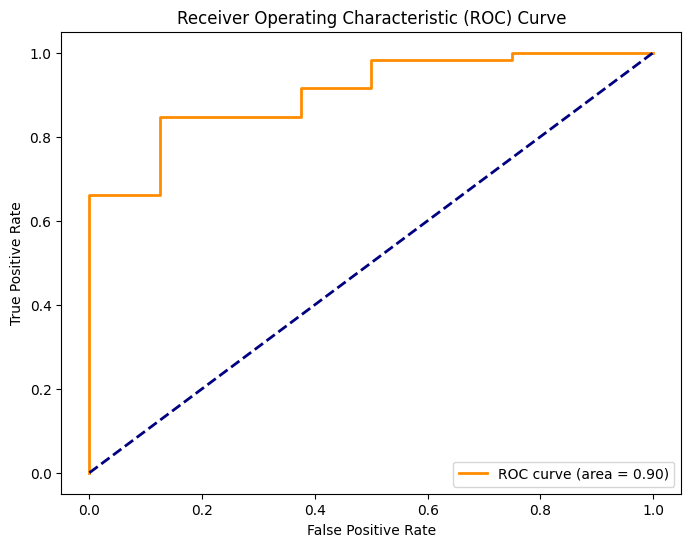

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ambil nilai probabilitas positif untuk setiap prediksi
probs = predictions_rf_tuned.select("probability").rdd.map(lambda x: x[0][1]).collect()

# Ambil nilai true labels
labels = predictions_rf_tuned.select("lung_cancer").rdd.map(lambda x: x[0]).collect()

# Menghitung nilai False Positive Rate (FPR) dan True Positive Rate (TPR) untuk kurva ROC
fpr, tpr, _ = roc_curve(labels, probs)

# Menghitung area di bawah kurva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


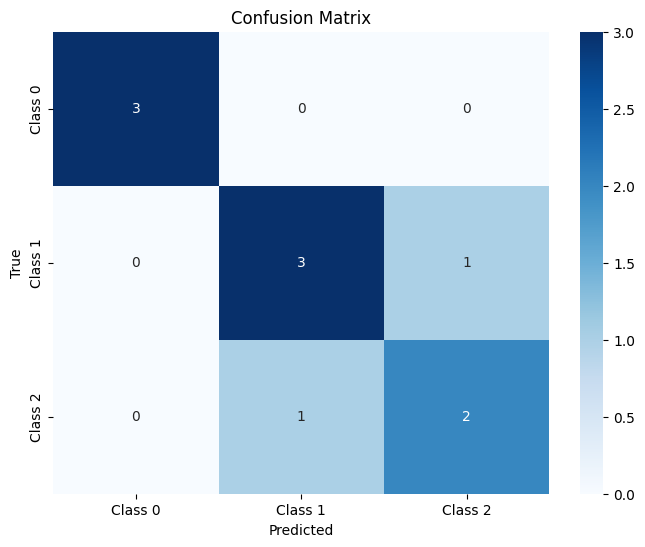

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh prediksi dan label sebenarnya
y_true = [1, 0, 1, 2, 0, 1, 2, 2, 0, 1]
y_pred = [1, 0, 1, 2, 0, 2, 1, 2, 0, 1]

# Membuat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()